# Dealing with missing values   

In [5]:
#Importing libraries

import pandas as pd  # for data manipulation -> DataFrame
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for statistical data visualization


In [8]:
# Load The data 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
# Accessing data
print(df.loc[0:2 , ["sex"]]) # Loc for accessing rows by index , and columns by name
print("\n\n")
print(df.iloc[0:2, 0:3] ) # Accessing specific rows and columns using iloc
print("\n\n")

# Displaying the first few rows of the DataFrame
print(df.head(3)) # Displaying the first 3 rows of the DataFrame
print("\n\n")

# Displaying the last few rows of the DataFrame
print(df.tail(3)) # Displaying the last 3 rows of the DataFrame
print("\n\n")

# Displaying the shape of the DataFrame
print(df.shape) # Shape of the DataFrame (rows, columns)
print("\n\n")

# Displaying the data types of each column
print(df.dtypes) # Data types of each column
print("\n\n")

# display datatypes of one column
print(df['age'].dtypes) # Data type of the 'age' column
print("\n\n")

#datatype for a value
print(type(df['age'][0])) # Data type of the first value in the 'age' column
print("\n\n")


# Displaying the summary statistics of the DataFrame
print(df.describe()) # Summary statistics for numerical columns
print("\n\n")

# Filtering the DataFrame
df[df['age'] > 22].head() 




      sex
0    male
1  female
2  female



   survived  pclass     sex
0         0       3    male
1         1       1  female



   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  



     survived  pclass     sex   age  sibsp  parch   fare embarked  class  \
888         0       3  female   NaN      1      2  23.45        S  Third   
889         1       1    male  26.0      0      0  30.00        C  First   
890         0       3    male  32.0      0      0   7.75        Q  Third   

       who  adult_male deck  embark_town 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


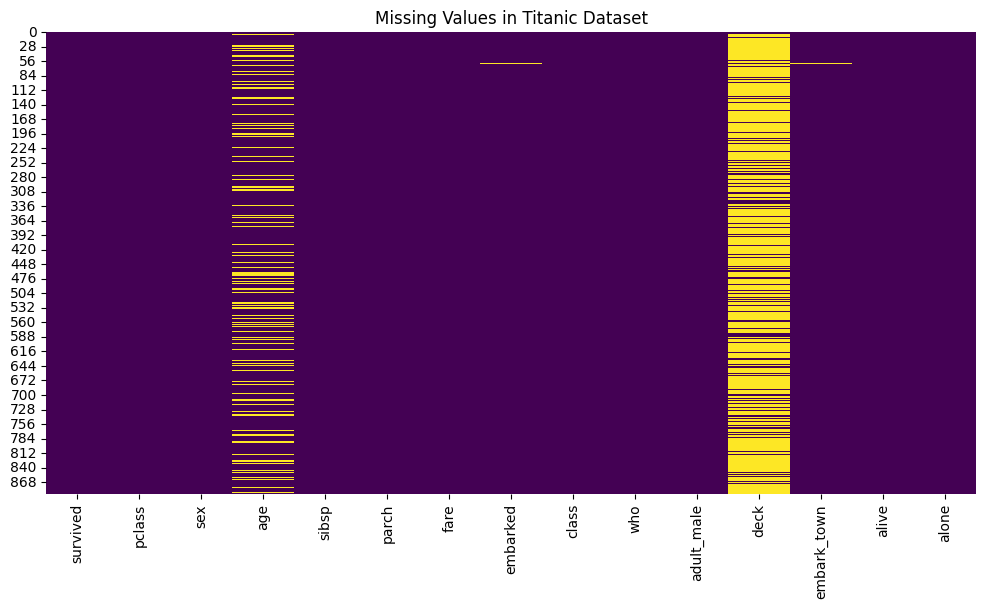

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Unique values in each column:
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64





In [44]:
#Plot to see missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# Show the plot
plt.title('Missing Values in Titanic Dataset')
plt.show()


# Displaying the count of missing values in each column
print(df.isnull().sum())  # Count of missing values in each column
# # BY data info
# print("\n\n")
# df.info()  # Displaying information about the DataFrame, including non-null counts and data types


# Displaying the count of unique values
print("\n\nUnique values in each column:")
print(df.nunique())  # Count of unique values in the 'age' column
print("\n\n")

